In [26]:
! pip install -q kaggle

In [27]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lithikaab20mis0061","key":"a50d41a8f70909a715fe1d8cca064245"}'}

In [28]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [29]:
! chmod 600 ~/.kaggle/kaggle.json

In [31]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          27297        768  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1829         51  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4411         92  1.0              
mohithsairamreddy/salary-data 

In [33]:
! kaggle datasets download -d akash2907/bird-species-classification --force

 99% 1.36G/1.37G [00:14<00:00, 150MB/s]
100% 1.37G/1.37G [00:14<00:00, 101MB/s]


In [34]:
! unzip /content/bird-species-classification.zip

Archive:  /content/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
g_train = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
g_test = ImageDataGenerator(rescale=(1./255))

In [38]:
train = g_train.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)
test = g_test.flow_from_directory('/content/test_data/test_data',
                                  target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [39]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [40]:
test.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [41]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [42]:
model=Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu')) 
model.add(Dense(16,activation='softmax')) 

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 71s 4s/step - loss: 3.5461 - accuracy: 0.1000 - val_loss: 2.9170 - val_accuracy: 0.1019
Epoch 2/10
19/19 [==============================] - 69s 4s/step - loss: 2.6161 - accuracy: 0.1933 - val_loss: 2.5789 - val_accuracy: 0.1975
Epoch 3/10
19/19 [==============================] - 71s 4s/step - loss: 2.2646 - accuracy: 0.2733 - val_loss: 2.6696 - val_accuracy: 0.2484
Epoch 4/10
19/19 [==============================] - 67s 4s/step - loss: 1.9336 - accuracy: 0.3933 - val_loss: 2.7425 - val_accuracy: 0.2166
Epoch 5/10
19/19 [==============================] - 70s 4s/step - loss: 1.7304 - accuracy: 0.4800 - val_loss: 2.6654 - val_accuracy: 0.2102
Epoch 6/10
19/19 [==============================] - 70s 4s/step - loss: 1.4566 - accuracy: 0.5333 - val_loss: 2.7577 - val_accuracy: 0.2229
Epoch 7/10
19/19 [==============================] - 73s 4s/step - loss: 1.2353 - accuracy: 0.6000 - val_loss: 2.8510 - val_accuracy: 0.2102
Epoch 8/10
19/19 [==

In [45]:
model.save('birdspecies.h5')

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image 

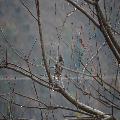

In [48]:
img = image.load_img('/content/train_data/train_data/jglowl/_D32_10285.jpg',target_size=(120,120))
img

In [49]:
img = image.img_to_array(img)
img

array([[[ 93.,  92.,  90.],
        [100.,  94.,  94.],
        [101.,  96.,  93.],
        ...,
        [ 77.,  80.,  87.],
        [ 71.,  74.,  79.],
        [ 74.,  79.,  83.]],

       [[ 92.,  87.,  91.],
        [ 93.,  87.,  89.],
        [ 88.,  88.,  90.],
        ...,
        [ 82.,  85.,  90.],
        [ 72.,  79.,  85.],
        [ 79.,  82.,  89.]],

       [[ 81.,  81.,  83.],
        [ 87.,  82.,  86.],
        [ 84.,  85.,  89.],
        ...,
        [ 88.,  89.,  93.],
        [ 77.,  82.,  86.],
        [ 82.,  83.,  87.]],

       ...,

       [[ 77.,  80.,  89.],
        [ 76.,  76.,  84.],
        [ 71.,  75.,  84.],
        ...,
        [ 93.,  95.,  94.],
        [ 88.,  92.,  91.],
        [ 81.,  87.,  87.]],

       [[ 82.,  78.,  77.],
        [ 87.,  81.,  83.],
        [ 89.,  88.,  86.],
        ...,
        [ 95.,  95.,  93.],
        [ 96.,  97.,  92.],
        [ 87.,  89.,  88.]],

       [[ 47.,  37.,  36.],
        [ 58.,  48.,  46.],
        [ 52.,  

In [50]:
img = np.expand_dims(img,axis=0)
img

array([[[[ 93.,  92.,  90.],
         [100.,  94.,  94.],
         [101.,  96.,  93.],
         ...,
         [ 77.,  80.,  87.],
         [ 71.,  74.,  79.],
         [ 74.,  79.,  83.]],

        [[ 92.,  87.,  91.],
         [ 93.,  87.,  89.],
         [ 88.,  88.,  90.],
         ...,
         [ 82.,  85.,  90.],
         [ 72.,  79.,  85.],
         [ 79.,  82.,  89.]],

        [[ 81.,  81.,  83.],
         [ 87.,  82.,  86.],
         [ 84.,  85.,  89.],
         ...,
         [ 88.,  89.,  93.],
         [ 77.,  82.,  86.],
         [ 82.,  83.,  87.]],

        ...,

        [[ 77.,  80.,  89.],
         [ 76.,  76.,  84.],
         [ 71.,  75.,  84.],
         ...,
         [ 93.,  95.,  94.],
         [ 88.,  92.,  91.],
         [ 81.,  87.,  87.]],

        [[ 82.,  78.,  77.],
         [ 87.,  81.,  83.],
         [ 89.,  88.,  86.],
         ...,
         [ 95.,  95.,  93.],
         [ 96.,  97.,  92.],
         [ 87.,  89.,  88.]],

        [[ 47.,  37.,  36.],
       

In [51]:
model.predict(img)

1/1 [==============================] - 0s 100ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],
      dtype=float32)

In [52]:
pred = np.argmax(model.predict(img))

1/1 [==============================] - 0s 28ms/step


In [53]:
import os
output = os.listdir('/content/train_data/train_data')
output

['mgprob',
 'lbicrw',
 'bonegl',
 'hsparo',
 'blasti',
 'cmnmyn',
 'himgri',
 'cbrtsh',
 'himbul',
 'hilpig',
 'rebimg',
 'wcrsrt',
 'brhkyt',
 'gretit',
 'indvul',
 'jglowl']

In [54]:
output[pred]

'wcrsrt'

In [55]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [56]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [57]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])